<a href="https://colab.research.google.com/github/apradols/classificacao-machine-learning/blob/main/machine_learning_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning: Classificação por trás dos panos

Importando os dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/Customer-Churn.csv')

In [3]:
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
dados.shape

(7043, 18)

Diferentes variáveis

Transformação manual

In [5]:
dict_traducao = {
    'Sim': 1,
    'Nao': 0
}

dados_modificados = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(dict_traducao)
dados_modificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


Transformação por get_dumies()

In [6]:
dumie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'],
                                        axis=1)
                             )
dados_final = pd.concat([dados_modificados, dumie_dados], axis=1)

In [7]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


definição formal

In [8]:
pd.set_option('display.max_columns', 39)

In [9]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


In [10]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

balanceando dados

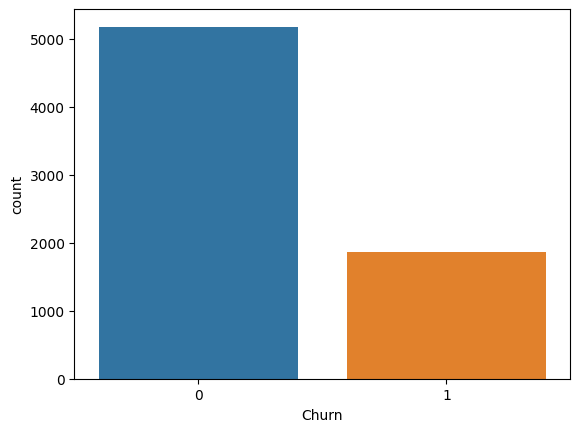

In [11]:
import seaborn as sns

ax = sns.countplot(x='Churn', data=dados_final)

In [12]:
dados_final.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
X = dados_final.drop('Churn', axis = 1)
Y = dados_final['Churn']

In [15]:
smt = SMOTE(random_state=123)
X, Y = smt.fit_resample(X, Y)

In [16]:
dados_final = pd.concat([X, Y], axis=1)

In [17]:
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


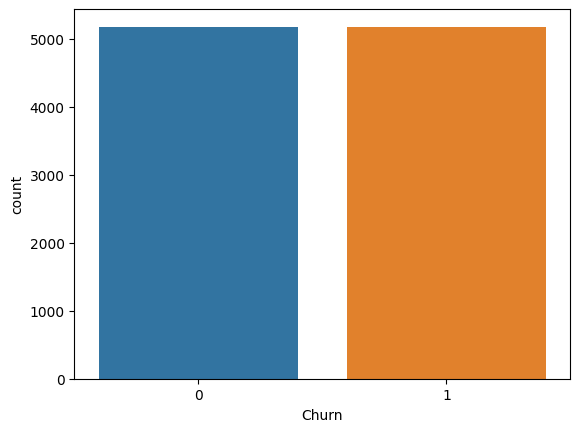

In [18]:
ax = sns.countplot(x='Churn', data=dados_final)

knn na pratica

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
norm = StandardScaler()

X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52771004, -3.06083934, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
         2.08712905, -0.4360152 ],
       ...,
       [-0.79024667, -0.52771004,  0.32670777, ...,  1.30373042,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ],
       [-0.79024667, -0.52771004,  0.32670777, ..., -0.76702973,
        -0.47912706, -0.4360152 ]])

In [21]:
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [22]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns =  X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

distândia euclidiana

In [23]:
import numpy as np

In [24]:
a = Xmaria_normalizado

In [25]:
b = X_normalizado[0]

In [26]:
a-b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [27]:
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [28]:
np.sum(np.square(a-b))


91.7112036526817

In [29]:
np.sqrt(84.07574038273466)

9.169282435541762

desafio - calcular a distancia de maria dos 10 primeiros clientes

In [30]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

In [31]:
calcula_distancia(X_normalizado, Xmaria_normalizado, 10)

[9.576596663360199,
 9.164687977147782,
 8.497169420877166,
 10.037544220142902,
 7.8028994013625566,
 9.01167938964265,
 8.970041771751976,
 10.634917481179656,
 9.45035230511453,
 7.919985943117673]

### Implementando o modelo

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, Y , test_size=0.3, random_state=123)

treino e teste

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(metric='euclidean') #padrao de 5 vizinhos

In [36]:
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [37]:
predito_knn = knn.predict(X_teste)

In [38]:
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

modelo bernoulli naive bayes

In [39]:
from sklearn.naive_bayes import BernoulliNB

In [40]:
np.median(X_treino)

-0.4461759755508453

In [41]:
median_abs = np.abs(np.median(X_treino))
median_abs

0.4461759755508453

In [42]:
bnb = BernoulliNB(binarize=median_abs)

In [43]:
bnb.fit(X_treino, y_treino)

BernoulliNB(binarize=0.4461759755508453)

In [44]:
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

modelo de arvore de decisão

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [47]:
dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [48]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01986065, 0.01886452,
       0.1627932 , 0.22212421, 0.00939177, 0.00344576, 0.01039829,
       0.0019815 , 0.03128648, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01299062, 0.00368329, 0.02047256,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03622159, 0.16358635, 0.07445054, 0.01758995,
       0.02117825, 0.02183557, 0.01975766])

In [49]:
predito_arvore_decisao = dtc.predict(X_teste)
predito_arvore_decisao

array([0, 0, 0, ..., 1, 1, 1])

### validando modelos

matriz de confusão

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


In [52]:
print(confusion_matrix(y_teste, predito_bnb))

[[1084  485]
 [ 238 1298]]


In [53]:
print(confusion_matrix(y_teste, predito_arvore_decisao))

[[1250  319]
 [ 275 1261]]


tipos de métricas: acurácia

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [56]:
print(accuracy_score(y_teste, predito_bnb))

0.7671497584541063


In [57]:
print(accuracy_score(y_teste, predito_arvore_decisao))

0.808695652173913


tipo de métricas: precisão

In [58]:
from sklearn.metrics import precision_score

In [59]:
print(precision_score(y_teste, predito_knn))

0.7975232198142415


In [60]:
print(precision_score(y_teste, predito_bnb))

0.727986539540101


In [61]:
print(precision_score(y_teste, predito_arvore_decisao))

0.7981012658227848


tipos de métricas: recall

In [62]:
from sklearn.metrics import recall_score

In [63]:
print(recall_score(y_teste, predito_knn))

0.8385416666666666


In [64]:
print(recall_score(y_teste, predito_bnb))

0.8450520833333334


In [65]:
print(recall_score(y_teste, predito_arvore_decisao))

0.8209635416666666


In [66]:
predito = [0,0,0,0,1,1,1,1,0,1,0,1]
y_teste_real = [1,1,0,0,1,1,1,0,1,0,1,0]

In [67]:
print(recall_score(y_teste_real, predito))

0.42857142857142855
